In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
search_term = ("@BBC", "@CBS", "@CNN","@FoxNews", "@nytimes")

rows=[]

for term in search_term:    
    print("> Extracting tweets for: "+term)
    for pg in range(5):  
        public_tweets = api.user_timeline(term, page=pg+1)            
        ctr=1
        for tweet in public_tweets:       
            print(">>> Reading Tweet: "+str(ctr)+" Of Page: "+str(pg+1))
            print(tweet["text"])
            #print(json.dumps(tweet, indent = 2, separators=(',', ': ')))            
            ctr+=1            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            positive = analyzer.polarity_scores(tweet["text"])["pos"]            
            neutral = analyzer.polarity_scores(tweet["text"])["neu"]
            negative = analyzer.polarity_scores(tweet["text"])["neg"]   
            txt=tweet["text"]
            dttm=datetime.strptime(tweet["created_at"] , '%a %b %d %H:%M:%S %z %Y')
            
            rows.append((term,txt,dttm,0,compound,positive,neutral,negative))        
    
sentim_df=pd.DataFrame(rows, columns=["Media Source","Tweet","DateTime","Tweets Ago","Compound", "Positive", "Neutral", "Negative"])


> Extracting tweets for: @BBC
>>> Reading Tweet: 1 Of Page: 1
America's opioid addiction, as explained by @ChelseaClinton. Via @BBC_Future. https://t.co/p3fxsiSeu0
>>> Reading Tweet: 2 Of Page: 1
They're back! French and Saunders will reunite for a Christmas special. 🎉 https://t.co/IkyTI9EFUB https://t.co/vkjFueBzyP
>>> Reading Tweet: 3 Of Page: 1
Astonishingly, some people still need to be told not to eat raw chicken. 🙅🐔 https://t.co/nnjrCmsAfH https://t.co/qLQClQRmri
>>> Reading Tweet: 4 Of Page: 1
'How are you in my house if you've never seen Lord of the Rings?' 😂 Via @BBCTheSocial. https://t.co/ApmQ1Q4Hrt
>>> Reading Tweet: 5 Of Page: 1
"I don't sit and knit." 👵 🎉 A woman celebrating her 111th birthday says having fun keeps her feeling young.… https://t.co/s2ZBJcf0UM
>>> Reading Tweet: 6 Of Page: 1
RT @BBCTwo: WARNING: This clip contains graphic scenes of outrageous ankle-kissing... 😳 #Quacks https://t.co/PLlPgzqMvX
>>> Reading Tweet: 7 Of Page: 1
RT @bbc5live: Look at this picture

>>> Reading Tweet: 1 Of Page: 4
RT @bbccomedy: It's 26 years this week since Bottom first aired! Saluting @AdrianEdmondson and the much-missed Rik Mayall ❤️ GAS MAN! GAS M…
>>> Reading Tweet: 2 Of Page: 4
19-year-old Swiss skier @AndriRagettli shows off his parkour skills during a training session. Via @BBCNewsbeat. ⛷ https://t.co/qcBpeWDVCZ
>>> Reading Tweet: 3 Of Page: 4
RT @BBCR1: Who's ready for @RitaOra in the Live Lounge? ✨

Make sure you're listening at 12pm 👉 https://t.co/48RuyzVNDg

#R1LiveLoungeMonth…
>>> Reading Tweet: 4 Of Page: 4
RT @AboutTheBBC: "Nothing worthwhile is easy" - John Morton, writer and director of #W1A and #TwentyTwelve blogs about the new series https…
>>> Reading Tweet: 5 Of Page: 4
RT @bbcpress: 🎬 First look at David Tennant and @MichaelSheen in @BBCTwo's #GoodOmens as filming begins: https://t.co/DnJWYqJaZf https://t.…
>>> Reading Tweet: 6 Of Page: 4
'It's been a hell of a journey to get to this point.'
#BattleToTheStartLine, now on @BBCiPlayer.… https:/

>>> Reading Tweet: 1 Of Page: 2
RT @TheEmmys: Congrats @rizmc on your Primetime #Emmy  Award for #TheNightof https://t.co/OUYAASicfe
>>> Reading Tweet: 2 Of Page: 2
RT @TheEmmys: Congrats @VeepHBO on your Primetime #Emmy  Award https://t.co/XL6IuF8HlF
>>> Reading Tweet: 3 Of Page: 2
RT @TheEmmys: Congrats @OfficialJLD on your Primetime #Emmy  Award for #Veep @VeepHBO https://t.co/HigOeXXyzz
>>> Reading Tweet: 4 Of Page: 2
Classic CBS stars, Norman Lear and Carol Burnett made an appearance tonight at the #Emmys! https://t.co/lkQp6uKMyg
>>> Reading Tweet: 5 Of Page: 2
CBS star @AllisonBJanney looks ravishing in white at the #Emmys. See all the best-dressed stars on the red carpet:… https://t.co/BFzxtrrjhx
>>> Reading Tweet: 6 Of Page: 2
RT @TheEmmys: Congrats @donaldglover on your Primetime #Emmy  Award for @AtlantaFX #Atlanta https://t.co/LAYFF77Rvb
>>> Reading Tweet: 7 Of Page: 2
RT @TheEmmys: Congrats @iamjohnoliver on your Primetime #Emmy  Award for #LastWeekTonight https://t.co/Heus

>>> Reading Tweet: 1 Of Page: 5
The Queen of Nashville, @dollyparton, has given the world so much more than music. Thank you for your generosity, D… https://t.co/FRuxzPVwC0
>>> Reading Tweet: 2 Of Page: 5
The legend, @BradPaisley honoring @dollyparton! So much talent packed onto the stage tonight! #ACMHonors https://t.co/mF7LQZu2FU
>>> Reading Tweet: 3 Of Page: 5
Congratulations @KelseaBallerini for receiving the Gene Weed Milestone Award! #ACMHonors https://t.co/D3rBxteQFa
>>> Reading Tweet: 4 Of Page: 5
RT @Momof3princess: My kids are laughing at me but I am singing right along #ACMHonors https://t.co/kSAoPXEqZQ
>>> Reading Tweet: 5 Of Page: 5
Toby Keith is bringing us back to 1993 with his debut single, “Should’ve Been a Cowboy!” #ACMHonors https://t.co/64kLnJQZoq
>>> Reading Tweet: 6 Of Page: 5
Congratulations, @Reba for receiving the Mae Boren Axton Service Award! #ACMHonors https://t.co/sI6bGXziAb
>>> Reading Tweet: 7 Of Page: 5
RT @GOPatterson: YES @HillaryScottLA AND @KarenFair

>>> Reading Tweet: 1 Of Page: 3
This was the view from the ground as a violent magnitude-7.1 earthquake rocked Mexico https://t.co/6tx4zk0Vk4 https://t.co/fAGiy7PuJA
>>> Reading Tweet: 2 Of Page: 3
Climate remains a rift in the Trump-Macron friendship https://t.co/lRgTmsNvSy https://t.co/flAPj7z2Ux
>>> Reading Tweet: 3 Of Page: 3
Sen. Cardin on North Korea: We need to find a diplomatic solution; a military solution would be catastrophic https://t.co/yNJdogMWzR
>>> Reading Tweet: 4 Of Page: 3
Trump's "Rocket Man" nickname for Kim Jong Un doesn't make any sense, Michael D'Antonio writes for @CNNOpinion https://t.co/LhnB0o4IfB
>>> Reading Tweet: 5 Of Page: 3
Millions of customers had their electricity service interrupted after the quake in central Mexico, the govt. said… https://t.co/Tn6mnqZfyk
>>> Reading Tweet: 6 Of Page: 3
The list of global companies being drawn into a vast graft scandal in South Africa is growing https://t.co/LXa39vNwiN
>>> Reading Tweet: 7 Of Page: 3
Dozens were kil

>>> Reading Tweet: 1 Of Page: 1
Woman kayaker in Amazon shot dead by pirates who robbed for her GoPro https://t.co/nUDT4liJMJ via @TheSun
>>> Reading Tweet: 2 Of Page: 1
#Hannity: 'President #Trump Has Been Vindicated' By Report of Spying on Manafort https://t.co/hVYKiUvd8s
>>> Reading Tweet: 3 Of Page: 1
Venezuelan Envoy Compares Trump's UN Speech to Reagan, Thinks It's an Insult https://t.co/lHqV86GLjj
>>> Reading Tweet: 4 Of Page: 1
Pres. el-Sisi: Rectifying the religious rhetoric means that we want to filter the false ideology &amp; the misconceptio… https://t.co/CkkYLwmEhS
>>> Reading Tweet: 5 Of Page: 1
.@GovMikeHuckabee: "[President #Trump's] speech today was bold, and it was a mark of clarity." #Hannity https://t.co/ymLAONJm6e
>>> Reading Tweet: 6 Of Page: 1
Fallen soldier's arrival home brings plane's passengers to tears https://t.co/Ou5IfBKLiT
>>> Reading Tweet: 7 Of Page: 1
.@seanhannity: "It's beyond refreshing and encouraging to have a president who is not afraid to call o

>>> Reading Tweet: 1 Of Page: 4
RT @FoxNewsResearch: North Korea →
•source country for forced labor &amp; sex trafficking
•holds apx 80K to 120K prisoners in political prison…
>>> Reading Tweet: 2 Of Page: 4
.@POTUS vowed to put "America first" during his #UNGA address. https://t.co/OxMHPGv50R https://t.co/mllWnQsjVe
>>> Reading Tweet: 3 Of Page: 4
.@RepDeSantis on @POTUS's speech to the @UN General Assembly: "This is the international UN version of draining the… https://t.co/F8IZNjuuCy
>>> Reading Tweet: 4 Of Page: 4
“The United States bears an unfair cost burden.” – @POTUS​ on the U.S. financial contribution to the United Nations… https://t.co/DE0ZeSqdkY
>>> Reading Tweet: 5 Of Page: 4
.@POTUS: "We will fight together, sacrifice together and stand together for peace." https://t.co/OxMHPGv50R https://t.co/4bPtMqEswe
>>> Reading Tweet: 6 Of Page: 4
.@POTUS: "The American story is the story of what is possible when people take ownership of their future."… https://t.co/XVF93M9VHU
>>> Rea

>>> Reading Tweet: 1 Of Page: 2
RT @PamelaPaulNYT: The brothers Green! https://t.co/FiZ2B7ydbk
>>> Reading Tweet: 2 Of Page: 2
"Isn’t that the Trump lawyer?": Here's how our reporter @kenvogel landed an accidental scoop. https://t.co/zOJ3qljupy
>>> Reading Tweet: 3 Of Page: 2
Caribbean island nation of Dominica sustained “mind boggling” damage from Hurricane Maria, prime minister said https://t.co/zqrsMJUpXV
>>> Reading Tweet: 4 Of Page: 2
RT @meslackman: More than 90 dead “You can do this, goddamn it, fight for your life, please!” screamed a man as he ran by the gurney https:…
>>> Reading Tweet: 5 Of Page: 2
Evening Briefing: Here's what you need to know at the end of the day https://t.co/QVD6xGjbZh
>>> Reading Tweet: 6 Of Page: 2
Blue states face biggest cuts under new Republican health care plan
https://t.co/5AiTEue6vp https://t.co/TMmZ9ofH3j
>>> Reading Tweet: 7 Of Page: 2
RT @sangerkatz: In case you were wondering, Graham-Cassidy could have effects on employer coverage too, same a

>>> Reading Tweet: 1 Of Page: 5
A German court fined 3 people for failing to help an elderly man who had collapsed near ATMs https://t.co/iTbmh0wqf1
>>> Reading Tweet: 2 Of Page: 5
Mueller and his team have used what some describe as shock-and-awe tactics in the Russia investigation https://t.co/3XP2NeTSrf
>>> Reading Tweet: 3 Of Page: 5
Robert Mueller's prosecutors told Paul Manafort they planned to indict him, said 2 people close to the investigation https://t.co/IpIvZuZPDB
>>> Reading Tweet: 4 Of Page: 5
Morning Briefing: Here's what you need to know to start your day https://t.co/ufDYEQNPwt https://t.co/7nTguCfFtE
>>> Reading Tweet: 5 Of Page: 5
Iceland's government falls after a letter asking to pardon a convicted pedophile https://t.co/TJfBx27X9X
>>> Reading Tweet: 6 Of Page: 5
"He was quiet and kept to himself. You know, head down, never smiled." On the suspects in the London Tube bombing: https://t.co/u7PDCbfGdV
>>> Reading Tweet: 7 Of Page: 5
The island nation of Dominica has 

In [3]:
sentim_df.head()

,Media Source,Tweet,DateTime,Tweets Ago,Compound,Positive,Neutral,Negative
0,@BBC,"America's opioid addiction, as explained by @C...",2017-09-19 18:37:03+00:00,0,0.0000,0.000,1.000,0.0
1,@BBC,They're back! French and Saunders will reunite...,2017-09-19 17:45:04+00:00,0,0.4574,0.214,0.786,0.0
2,@BBC,"Astonishingly, some people still need to be to...",2017-09-19 16:55:05+00:00,0,0.0000,0.000,1.000,0.0
3,@BBC,'How are you in my house if you've never seen ...,2017-09-19 16:25:06+00:00,0,0.0000,0.000,1.000,0.0
4,@BBC,"""I don't sit and knit."" 👵 🎉 A woman celebratin...",2017-09-19 16:02:03+00:00,0,0.8176,0.362,0.638,0.0


In [4]:
sentim_df=sentim_df.sort_values(["Media Source","DateTime"], ascending = False).reset_index(drop=True)

prev_media=""
for index, row in sentim_df.iterrows():
    
    if row["Media Source"]!=prev_media:
        ctr=1
        sentim_df.loc[index, 'Tweets Ago'] = ctr
        prev_media=row["Media Source"]        
    else: 
        ctr+=1
        sentim_df.loc[index, 'Tweets Ago']=ctr

In [5]:
sentim_df

,Media Source,Tweet,DateTime,Tweets Ago,Compound,Positive,Neutral,Negative
0,@nytimes,Republicans appear ready to abandon fiscal doc...,2017-09-20 03:17:07+00:00,1,-0.1027,0.144,0.690,0.167
1,@nytimes,As UC Berkeley braces for more protests over s...,2017-09-20 03:02:06+00:00,2,0.0790,0.110,0.793,0.097
2,@nytimes,International tourism to the U.S. declined in ...,2017-09-20 02:47:01+00:00,3,-0.3182,0.000,0.881,0.119
3,@nytimes,Critics say Michael Dourson is too closely tie...,2017-09-20 02:32:05+00:00,4,-0.2960,0.000,0.891,0.109
4,@nytimes,He was 22 when he was charged with capital mur...,2017-09-20 02:17:07+00:00,5,-0.7579,0.000,0.723,0.277
5,@nytimes,Republican leaders pressed toward a showdown v...,2017-09-20 02:02:03+00:00,6,0.4939,0.198,0.802,0.000
6,@nytimes,"RT @NYTSports: With an 8th-inning solo shot, A...",2017-09-20 01:50:48+00:00,7,-0.4215,0.000,0.843,0.157
7,@nytimes,RT @NYTStyles: Colored eyeliner isn’t as trick...,2017-09-20 01:47:05+00:00,8,-0.1531,0.000,0.904,0.096
8,@nytimes,Hank Green's first novel will grapple with the...,2017-09-20 01:32:07+00:00,9,0.6486,0.295,0.575,0.130
9,@nytimes,Death toll in Mexico earthquake continues to c...,2017-09-20 01:17:05+00:00,10,-0.8658,0.000,0.607,0.393


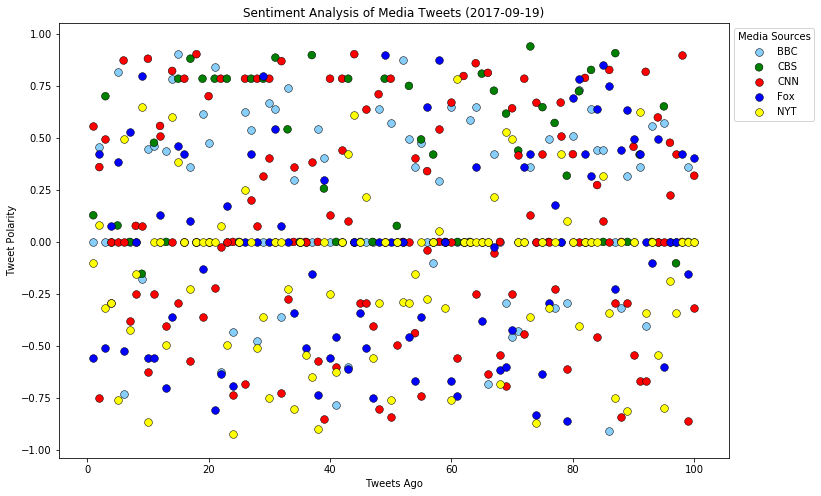

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Sentiment Analysis of Media Tweets ("+str(datetime.now().date())+")")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

p_bbc=plt.scatter(sentim_df["Tweets Ago"].loc[sentim_df["Media Source"]=="@BBC"],
                  sentim_df["Compound"].loc[sentim_df["Media Source"]=="@BBC"],
                  c="lightskyblue",label="BBC",alpha=1,linewidths=.5,edgecolor="black",s=60)

p_cbs=plt.scatter(            
             sentim_df["Tweets Ago"].loc[sentim_df["Media Source"]=="@CBS"],
             sentim_df["Compound"].loc[sentim_df["Media Source"]=="@CBS"],
             c="gr",label="CBS",alpha=1,linewidths=.5,edgecolor="black",s=60)


p_cnn=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Media Source"]=="@CNN"],
            sentim_df["Compound"].loc[sentim_df["Media Source"]=="@CNN"],
            c="red",label="CNN",alpha=1,linewidths=.5,edgecolor="black",s=60)

p_fox=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Media Source"]=="@FoxNews"],
            sentim_df["Compound"].loc[sentim_df["Media Source"]=="@FoxNews"],
            c="blue",label="FOX",alpha=1,linewidths=.5,edgecolor="black",s=60)

p_nyt=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Media Source"]=="@nytimes"],
            sentim_df["Compound"].loc[sentim_df["Media Source"]=="@nytimes"],
            c="yellow",label="NYT",alpha=1,linewidths=.5,edgecolor="black",s=60)

plt.legend((p_bbc,p_cbs,p_cnn,p_fox,p_nyt),
           ("BBC","CBS","CNN","Fox","NYT"),title="Media Sources",bbox_to_anchor=(1, 1))

plt.show()

In [7]:
sentim_avg_df=sentim_df.groupby(["Media Source"],as_index=False).mean()

In [8]:
sentim_avg_df

,Media Source,Tweets Ago,Compound,Positive,Neutral,Negative
0,@BBC,50.5,0.144434,0.09577,0.86224,0.04200
1,@CBS,50.5,0.462533,0.22308,0.76698,0.00995
2,@CNN,50.5,-0.135703,0.05154,0.84613,0.10232
3,@FoxNews,50.5,-0.025310,0.09452,0.79717,0.10831
4,@nytimes,50.5,-0.137950,0.04390,0.86401,0.09211


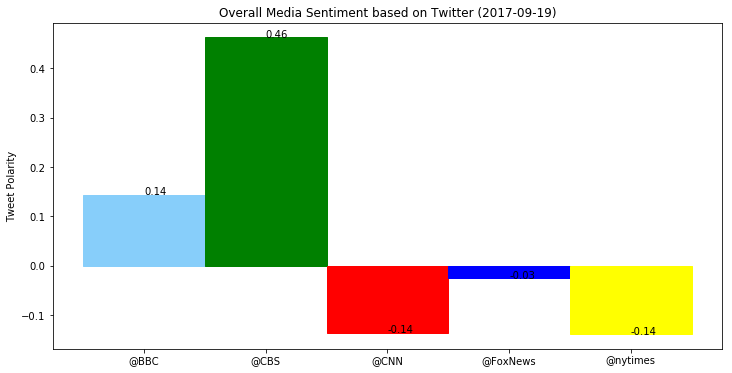

In [9]:
# Setting the positions and width for the bars

pos = list(range(len(sentim_avg_df['Compound']))) 
width = 1 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))


news_bars=plt.bar(pos,         
         sentim_avg_df['Compound'], 
         width,
         alpha=1,
         label=sentim_avg_df['Media Source'][0])
news_bars[0].set_color('lightskyblue')
news_bars[1].set_color('green')
news_bars[2].set_color('red')
news_bars[3].set_color('blue')
news_bars[4].set_color('yellow')
ctr=0
for index, row in sentim_avg_df.iterrows():
    ax.text(ctr,row["Compound"],round(row["Compound"],2))
    ctr+=1

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter ("+str(datetime.now().date())+")")
ax.set_xticks([p * width for p in pos])
ax.set_xticklabels(sentim_avg_df['Media Source'])

#Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(sentim_avg_df['Compound'])])


plt.show()

In [10]:
sentim_df.to_csv("./Resources/newsmood.csv")